In [1]:
import pandas as pd
df = pd.read_csv("/Users/hanqiwang/Downloads/final_df.csv")

/var/folders/w2/fpv3dr9x7fg8w_hs88ng7x880000gn/T/ipykernel_68296/1397758037.py:2: DtypeWarning: Columns (0,1,2,16,17,18,19,20,24,26,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/hanqiwang/Downloads/final_df.csv")


In [3]:
df.head()

,FIRE_NAME,ALARM_DATE,CONT_DATE,max_temp_c,min_temp_c,avg_temp_c,heating_deg_days_c,cooling_deg_days_c,precip_mm,avg_humidity,...,FIRE_NUM,COMPLEX_ID,DECADES,Shape__Area,Shape__Length,index_right,COUNTY,Fire_longitude,Fire_latitude,fire
0,1-10,2023-08-15,2023-08-18,37.013349,15.798769,26.406059,0.0,8.076059,388.686388,48.303006,...,NaN,NaN,2020.0,3.929247e+05,3555.765061,17.0,Trinity,-123.248125,40.021993,1
1,1-11,2020-08-17,2020-09-10,41.424815,23.288019,32.356417,0.0,14.020426,-1.000000,41.740000,...,NaN,9692.0,2020.0,8.404952e+04,1243.225444,43.0,Butte,-121.501162,39.898653,1
2,1-12,2020-08-24,2020-09-10,37.322267,21.320844,29.318342,0.0,10.988342,-1.000000,35.710000,...,NaN,9692.0,2020.0,6.530779e+06,18556.525653,43.0,Butte,-121.578489,39.962420,1
3,1-4 BIZZ,2021-06-23,2021-06-25,31.100000,12.800000,21.950000,0.0,3.620000,-1.000000,43.440000,...,NaN,NaN,2020.0,9.705654e+04,1569.627664,13.0,Lassen,-120.771701,40.397262,1
4,1-7,2020-08-17,2020-09-26,41.551160,23.287271,32.419216,0.0,14.082851,-1.000000,41.740000,...,NaN,9692.0,2020.0,1.207709e+06,6517.765383,43.0,Butte,-121.582855,40.027764,1



=== Exploratory Data Analysis ===

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342875 entries, 0 to 342874
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   FIRE_NAME                  2049 non-null    object 
 1   ALARM_DATE                 2070 non-null    object 
 2   CONT_DATE                  2070 non-null    object 
 3   max_temp_c                 342875 non-null  float64
 4   min_temp_c                 342875 non-null  float64
 5   avg_temp_c                 342875 non-null  float64
 6   heating_deg_days_c         342875 non-null  float64
 7   cooling_deg_days_c         342875 non-null  float64
 8   precip_mm                  342875 non-null  float64
 9   avg_humidity               342875 non-null  float64
 10  avg_wind_speed_knots       342875 non-null  float64
 11  avg_dew_point_f            342875 non-null  float64
 12  avg_visibility_km          3428

/Users/hanqiwang/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [08:20:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/hanqiwang/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [08:20:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/hanqiwang/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [08:20:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/hanqiwang/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [08:20:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

Best parameters: {'classifier__subsample': 1.0, 'classifier__scale_pos_weight': 1, 'classifier__n_estimators': 300, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.2, 'classifier__colsample_bytree': 1.0}
Tuned model optimal threshold: 0.75 with F2 score: 0.5571

Tuned Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85201
           1       0.56      0.56      0.56       518

    accuracy                           0.99     85719
   macro avg       0.78      0.78      0.78     85719
weighted avg       0.99      0.99      0.99     85719

Tuned Model ROC AUC Score: 0.9268
Confusion matrix saved to 'confusion_matrix.png'

Model saved to 'fire_prediction_model.pkl'

=== Example Prediction ===
Fire Probability: 0.0070
Fire Risk Level: Low

=== Fire Prediction Model Complete ===


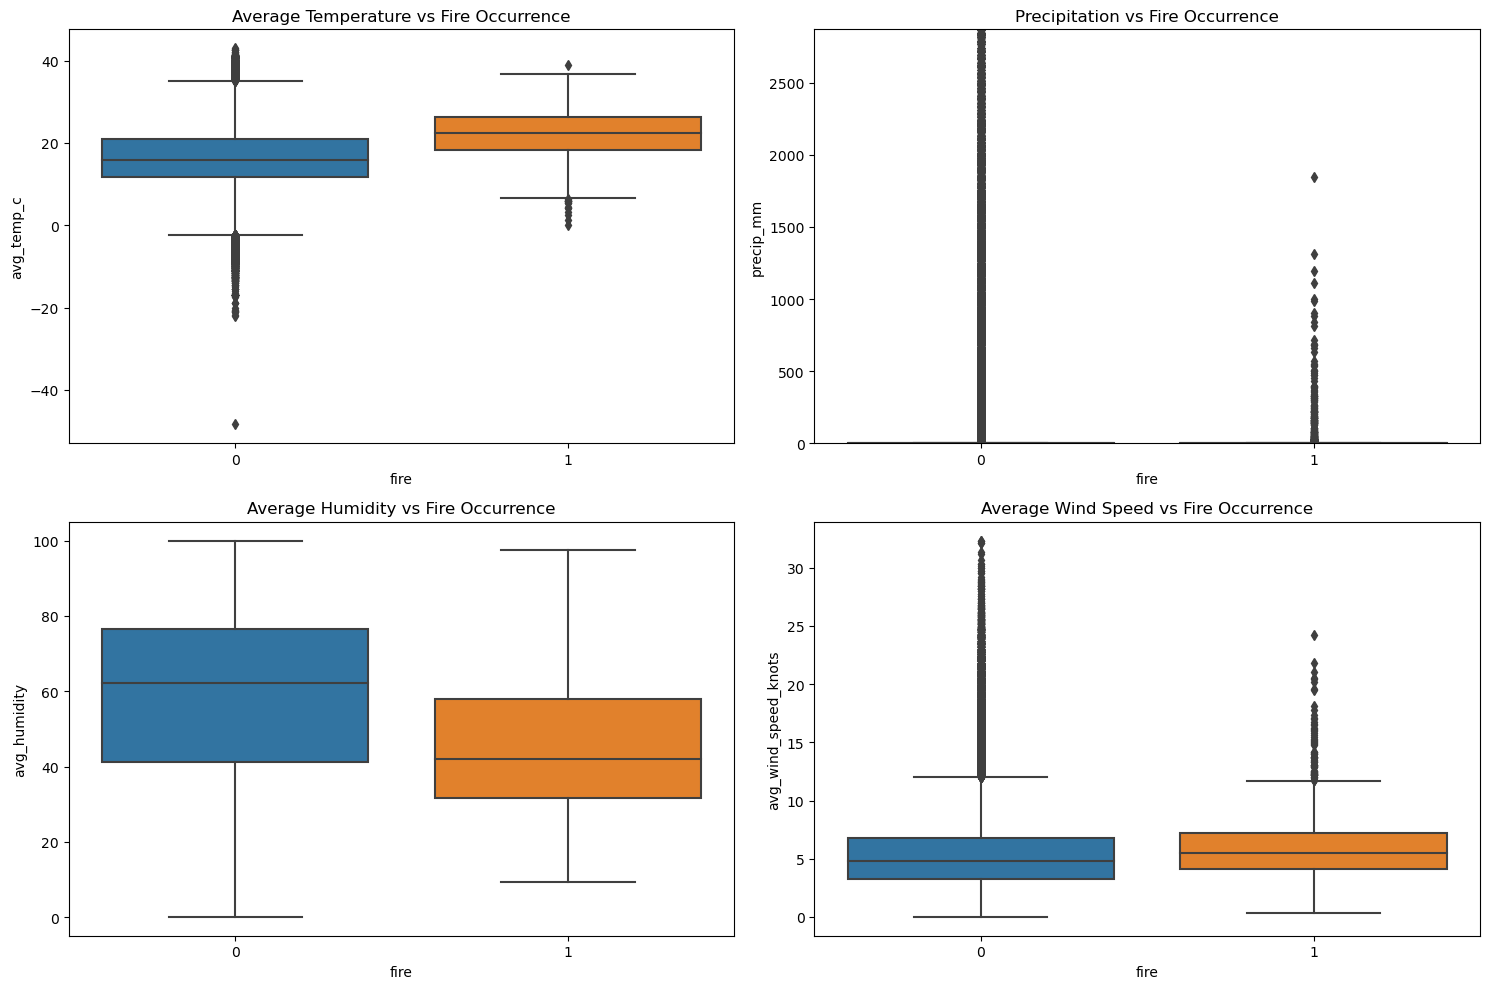

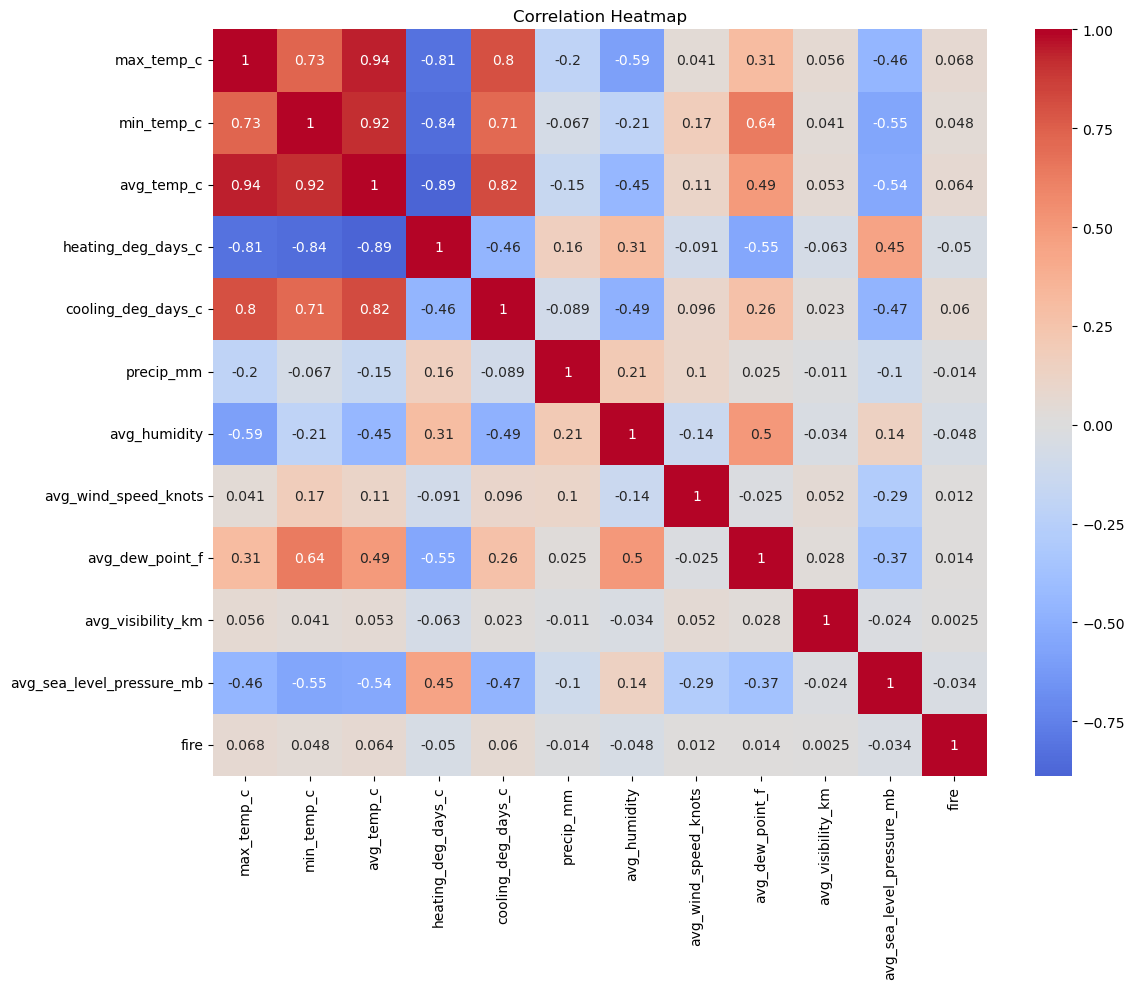

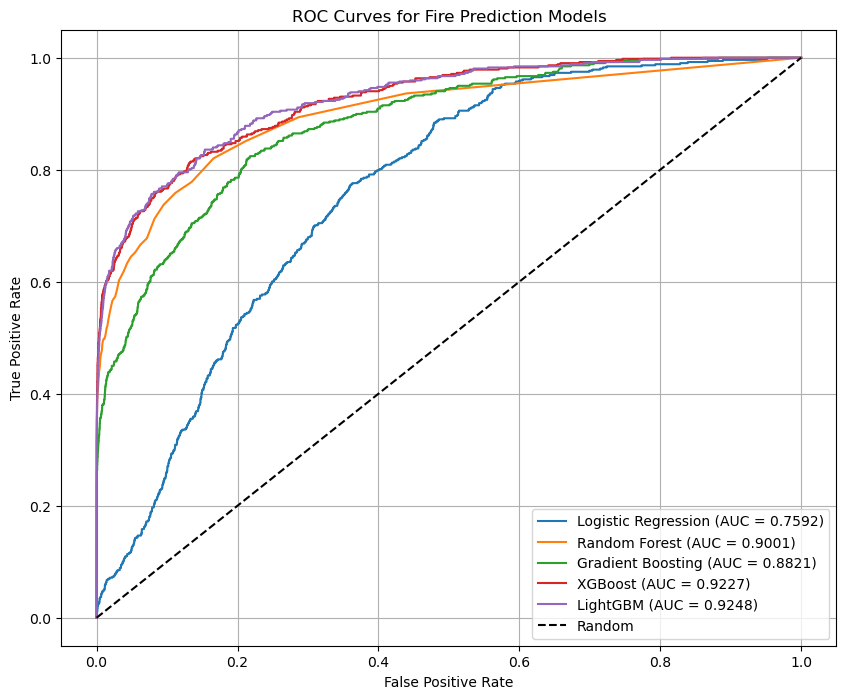

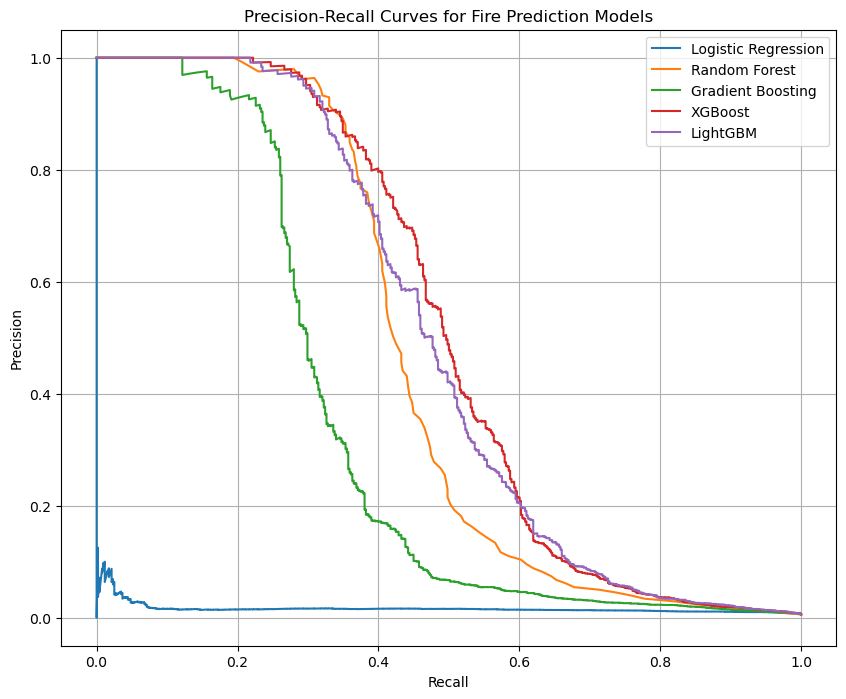

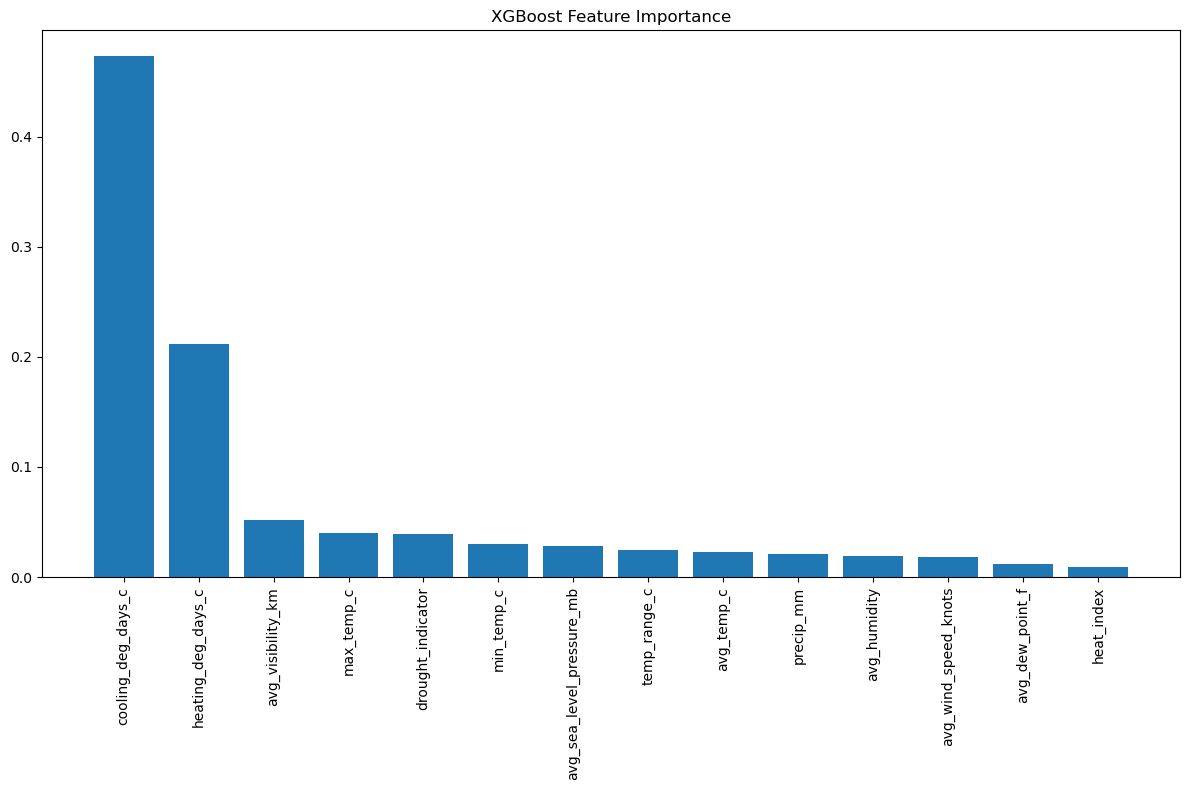

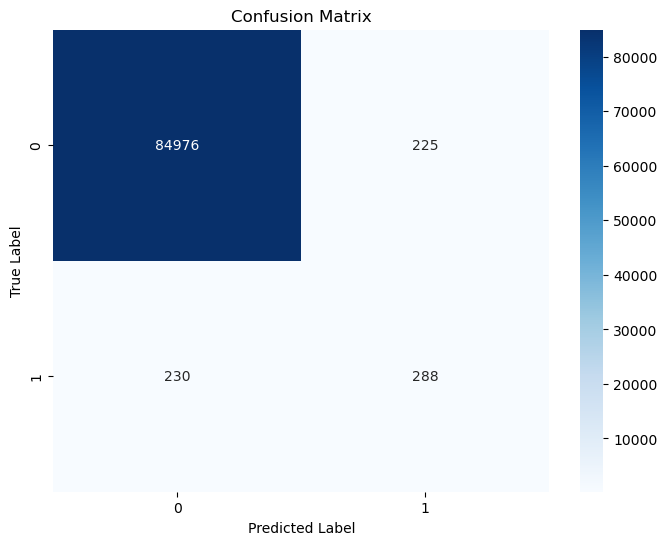

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve,
                             precision_recall_curve, fbeta_score, make_scorer)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
import pickle

# Define F2 score (beta=2) scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# 1. Load the data
def load_data(file_path):
    """Load the CSV file into a pandas DataFrame."""
    print(f"Loading data from {file_path} ...")
    df = pd.read_csv(file_path)
    print(f"Dataset shape: {df.shape}")
    return df

# 2. Exploratory Data Analysis
def explore_data(df):
    """Perform exploratory data analysis on the dataset."""
    print("\n=== Exploratory Data Analysis ===")

    # Basic information
    print("\nBasic information:")
    print(df.info())

    # Check for missing values
    print("\nMissing values by column:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    # Check target variable distribution
    print("\nTarget variable distribution (percentage):")
    print(df['fire'].value_counts(normalize=True) * 100)

    # Analyze numerical features
    numerical_features = [
        'max_temp_c', 'min_temp_c', 'avg_temp_c', 'heating_deg_days_c',
        'cooling_deg_days_c', 'precip_mm', 'avg_humidity', 'avg_wind_speed_knots',
        'avg_dew_point_f', 'avg_visibility_km', 'avg_sea_level_pressure_mb'
    ]

    print("\nNumerical features statistics:")
    print(df[numerical_features].describe())

    # Visualizations
    plt.figure(figsize=(15, 10))

    # Temperature vs Fire
    plt.subplot(2, 2, 1)
    sns.boxplot(x='fire', y='avg_temp_c', data=df)
    plt.title('Average Temperature vs Fire Occurrence')

    # Precipitation vs Fire
    plt.subplot(2, 2, 2)
    sns.boxplot(x='fire', y='precip_mm', data=df)
    plt.title('Precipitation vs Fire Occurrence')
    plt.ylim(0, df['precip_mm'].quantile(0.99))

    # Humidity vs Fire
    plt.subplot(2, 2, 3)
    sns.boxplot(x='fire', y='avg_humidity', data=df)
    plt.title('Average Humidity vs Fire Occurrence')

    # Wind Speed vs Fire
    plt.subplot(2, 2, 4)
    sns.boxplot(x='fire', y='avg_wind_speed_knots', data=df)
    plt.title('Average Wind Speed vs Fire Occurrence')

    plt.tight_layout()
    plt.savefig('eda_plots.png')
    print("EDA plots saved to 'eda_plots.png'")

    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    corr_matrix = df[numerical_features + ['fire']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    print("Correlation heatmap saved to 'correlation_heatmap.png'")

    return numerical_features

# 3. Data Preprocessing
def preprocess_data(df, numerical_features):
    """Preprocess the data for modeling."""
    print("\n=== Data Preprocessing ===")

    df_cleaned = df.copy()

    # Handle negative precipitation values
    print("\nCleaning precipitation data...")
    df_cleaned['precip_mm'] = df_cleaned['precip_mm'].apply(lambda x: 0 if x < 0 else x)

    # Cap extreme values for visibility
    print("Capping extreme values...")
    df_cleaned['avg_visibility_km'] = df_cleaned['avg_visibility_km'].clip(-100, 100)

    # Create new features
    print("Creating new features...")
    df_cleaned['temp_range_c'] = df_cleaned['max_temp_c'] - df_cleaned['min_temp_c']
    df_cleaned['heat_index'] = df_cleaned['avg_temp_c'] * (1 + 0.01 * df_cleaned['avg_humidity'])
    df_cleaned['drought_indicator'] = ((df_cleaned['precip_mm'] < 5) & (df_cleaned['avg_temp_c'] > 25)).astype(int)

    selected_features = numerical_features + ['temp_range_c', 'heat_index', 'drought_indicator']

    X = df_cleaned[selected_features]
    y = df_cleaned['fire']

    # Fill missing values with the median
    for column in X.columns:
        median_value = X[column].median()
        X[column] = X[column].fillna(median_value)

    print(f"Processed feature set shape: {X.shape}")
    return X, y, selected_features

# 4. Model Training and Evaluation
def train_evaluate_model(X, y, selected_features):
    """Train and evaluate the fire prediction models."""
    print("\n=== Model Training and Evaluation ===")

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
    print(f"Fire occurrences in training set: {sum(y_train)} ({sum(y_train)/len(y_train)*100:.2f}%)")
    print(f"Fire occurrences in test set: {sum(y_test)} ({sum(y_test)/len(y_test)*100:.2f}%)")

    # Handle class imbalance using SMOTE
    print("\nApplying SMOTE to handle class imbalance...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print(f"Resampled training set shape: {X_train_resampled.shape}")
    print(f"Fire occurrences in resampled training set: {sum(y_train_resampled)} ({sum(y_train_resampled)/len(y_train_resampled)*100:.2f}%)")

    # Create preprocessing pipeline
    preprocessor = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Define models with class weighting where applicable
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),  # Does not support class_weight
        'XGBoost': XGBClassifier(random_state=42, scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss'),
        'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced')
    }

    model_performance = {}

    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"\nTraining {model_name} ...")

        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        pipeline.fit(X_train_resampled, y_train_resampled)

        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

        # Threshold optimization: find the best threshold that maximizes the F2 score
        thresholds = np.linspace(0, 1, 101)
        f2_scores = []
        for threshold in thresholds:
            y_pred_thresh = (y_pred_proba >= threshold).astype(int)
            f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
            f2_scores.append(f2)
        best_threshold = thresholds[np.argmax(f2_scores)]
        best_f2 = max(f2_scores)
        print(f"{model_name} optimal threshold: {best_threshold:.2f} with F2 score: {best_f2:.4f}")

        # Generate predicted labels using the best threshold
        y_pred_opt = (y_pred_proba >= best_threshold).astype(int)
        print(f"\n{model_name} Classification Report (using optimal threshold):")
        print(classification_report(y_test, y_pred_opt))

        # Store model performance
        model_performance[model_name] = {
            'model': pipeline,
            'roc_auc': roc_auc_score(y_test, y_pred_proba),
            'optimal_threshold': best_threshold,
            'f2_score': best_f2,
            'y_pred_proba': y_pred_proba
        }

    # Select the best model based on F2 score
    best_model_name = max(model_performance, key=lambda k: model_performance[k]['f2_score'])
    best_model_info = model_performance[best_model_name]
    best_model = best_model_info['model']
    print(f"\nBest model: {best_model_name} with F2 score: {best_model_info['f2_score']:.4f}")

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    for model_name, perf in model_performance.items():
        fpr, tpr, _ = roc_curve(y_test, perf['y_pred_proba'])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {perf['roc_auc']:.4f})")
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Fire Prediction Models')
    plt.legend()
    plt.grid(True)
    plt.savefig('roc_curves.png')
    print("ROC curves saved to 'roc_curves.png'")

    # Plot Precision-Recall curves
    plt.figure(figsize=(10, 8))
    for model_name, perf in model_performance.items():
        precision, recall, _ = precision_recall_curve(y_test, perf['y_pred_proba'])
        plt.plot(recall, precision, label=f"{model_name}")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for Fire Prediction Models')
    plt.legend()
    plt.grid(True)
    plt.savefig('pr_curve.png')
    print("Precision-Recall curve saved to 'pr_curve.png'")

    # Feature importance analysis (for models that support it)
    if best_model_name in ['Random Forest', 'Gradient Boosting', 'LightGBM', 'XGBoost']:
        feature_importances = best_model.named_steps['classifier'].feature_importances_
        indices = np.argsort(feature_importances)[::-1]
        plt.figure(figsize=(12, 8))
        plt.title(f"{best_model_name} Feature Importance")
        plt.bar(range(len(selected_features)), feature_importances[indices], align='center')
        plt.xticks(range(len(selected_features)), [selected_features[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.savefig('feature_importance.png')
        print("Feature importance plot saved to 'feature_importance.png'")

    # Save the optimal threshold to the model object for later use
    best_model.optimal_threshold = best_model_info['optimal_threshold']

    return best_model, best_model_name

# 5. Fine-tune the best model
def fine_tune_model(X, y, best_model, best_model_name):
    """Fine-tune the best model using randomized search."""
    print(f"\n=== Fine-tuning {best_model_name} ===")

    # Define parameter distributions for hyperparameter tuning
    if best_model_name == 'Logistic Regression':
        param_distributions = {
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l1', 'l2', 'elasticnet'],
            'classifier__solver': ['saga'],
            'classifier__l1_ratio': [0.2, 0.5, 0.8],
            'classifier__class_weight': ['balanced']
        }
    elif best_model_name == 'Random Forest':
        param_distributions = {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__class_weight': ['balanced']
        }
    elif best_model_name == 'Gradient Boosting':
        param_distributions = {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    elif best_model_name == 'XGBoost':
        param_distributions = {
            'classifier__max_depth': [3, 5, 7],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__n_estimators': [100, 200, 300],
            'classifier__subsample': [0.8, 1.0],
            'classifier__colsample_bytree': [0.8, 1.0],
            'classifier__scale_pos_weight': [1, 2, 3]
        }
    elif best_model_name == 'LightGBM':
        param_distributions = {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [-1, 10, 20, 30],
            'classifier__num_leaves': [31, 50, 100],
            'classifier__class_weight': ['balanced']
        }
    else:
        print(f"No parameter distributions defined for {best_model_name}. Skipping fine-tuning.")
        return best_model

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    random_search = RandomizedSearchCV(
        estimator=best_model,
        param_distributions=param_distributions,
        n_iter=50,
        cv=5,
        scoring=f2_scorer,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    print("Performing random search for optimal hyperparameters...")
    random_search.fit(X_train_resampled, y_train_resampled)
    best_params = random_search.best_params_
    print(f"Best parameters: {best_params}")
    tuned_model = random_search.best_estimator_

    # Recalculate optimal threshold for the tuned model
    y_pred_proba = tuned_model.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0, 1, 101)
    f2_scores = []
    for threshold in thresholds:
        y_pred_thresh = (y_pred_proba >= threshold).astype(int)
        f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
        f2_scores.append(f2)
    best_threshold = thresholds[np.argmax(f2_scores)]
    best_f2 = max(f2_scores)
    print(f"Tuned model optimal threshold: {best_threshold:.2f} with F2 score: {best_f2:.4f}")

    # Save the optimal threshold to the model object
    tuned_model.optimal_threshold = best_threshold

    y_pred_opt = (y_pred_proba >= best_threshold).astype(int)
    print("\nTuned Model Performance:")
    print(classification_report(y_test, y_pred_opt))

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Tuned Model ROC AUC Score: {roc_auc:.4f}")

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred_opt)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig('confusion_matrix.png')
    print("Confusion matrix saved to 'confusion_matrix.png'")

    return tuned_model

# 6. Prediction function
def predict_fire_risk(model, input_data, selected_features):
    """Predict fire risk for new data."""
    # Ensure input data contains all required features
    for feature in selected_features:
        if feature not in input_data:
            input_data[feature] = 0

    input_df = pd.DataFrame([input_data])[selected_features]
    fire_prob = model.predict_proba(input_df)[0, 1]

    # Use the model's stored optimal threshold if available, else default to 0.7
    threshold = getattr(model, 'optimal_threshold', 0.7)
    fire_risk = "High" if fire_prob >= threshold else "Low"

    return {
        'fire_probability': fire_prob,
        'fire_risk_level': fire_risk
    }

# 7. Main function
def main():
    """Main function to run the fire prediction model."""
    file_path = 'final_df.csv'

    # 1. Load data
    df = pd.read_csv("/Users/hanqiwang/Downloads/final_df.csv")

    # 2. Exploratory Data Analysis
    numerical_features = explore_data(df)

    # 3. Data Preprocessing
    X, y, selected_features = preprocess_data(df, numerical_features)

    # 4. Train and Evaluate Models
    best_model, best_model_name = train_evaluate_model(X, y, selected_features)

    # 5. Fine-tune the best model
    tuned_model = fine_tune_model(X, y, best_model, best_model_name)

    # Save the model
    with open('fire_prediction_model.pkl', 'wb') as f:
        pickle.dump(tuned_model, f)
    print("\nModel saved to 'fire_prediction_model.pkl'")

    # 6. Example Prediction
    print("\n=== Example Prediction ===")
    example_data = {
        'max_temp_c': 35.0,
        'min_temp_c': 20.0,
        'avg_temp_c': 28.0,
        'heating_deg_days_c': 0.0,
        'cooling_deg_days_c': 10.0,
        'precip_mm': 5.0,
        'avg_humidity': 30.0,
        'avg_wind_speed_knots': 8.0,
        'avg_dew_point_f': 10.0,
        'avg_visibility_km': 15.0,
        'avg_sea_level_pressure_mb': 1010.0,
        'temp_range_c': 15.0,
        'heat_index': 28.0 * (1 + 0.01 * 30.0),
        'drought_indicator': 1
    }

    prediction = predict_fire_risk(tuned_model, example_data, selected_features)
    print(f"Fire Probability: {prediction['fire_probability']:.4f}")
    print(f"Fire Risk Level: {prediction['fire_risk_level']}")

    print("\n=== Fire Prediction Model Complete ===")

if __name__ == "__main__":
    main()


In [27]:
api_code = """
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

model = joblib.load("fire_prediction_model.pkl")
selected_features = [
    'max_temp_c', 'min_temp_c', 'avg_temp_c', 'heating_deg_days_c',
    'cooling_deg_days_c', 'precip_mm', 'avg_humidity',
    'avg_wind_speed_knots', 'avg_dew_point_f', 'avg_visibility_km',
    'avg_sea_level_pressure_mb', 'temp_range_c', 'heat_index', 'drought_indicator'
]

app = FastAPI()

class FireRequest(BaseModel):
    max_temp_c: float
    min_temp_c: float
    avg_temp_c: float
    heating_deg_days_c: float
    cooling_deg_days_c: float
    precip_mm: float
    avg_humidity: float
    avg_wind_speed_knots: float
    avg_dew_point_f: float
    avg_visibility_km: float
    avg_sea_level_pressure_mb: float

@app.post("/predict")
def predict_fire_prob(req: FireRequest):
    temp_range = req.max_temp_c - req.min_temp_c
    heat_index = req.avg_temp_c * (1 + 0.01 * req.avg_humidity)
    drought_indicator = int(req.precip_mm < 5 and req.avg_temp_c > 25)

    input_data = {
        **req.dict(),
        "temp_range_c": temp_range,
        "heat_index": heat_index,
        "drought_indicator": drought_indicator
    }

    input_df = pd.DataFrame([input_data])[selected_features]
    fire_prob = model.predict_proba(input_df)[0, 1]

    return {
        "fire_probability": round(float(fire_prob), 4)
    }
"""

with open("/Users/hanqiwang/Downloads/api.py", "w") as f:
    f.write(api_code)


In [25]:
import os
os.getcwd()

'/Users/hanqiwang/Downloads'